In [12]:
import sys
import os
from pathlib import Path
pythonPath = Path(os.getcwd()).resolve().parent.parent / "python"
rmsKitPath = pythonPath / "rmsKit"
sys.path.append(rmsKitPath.as_posix())
from utils import path_with_lowest_loss, sum_ham, stoquastic  # noqa: E402
import numpy as np  # noqa: E402
from lattice import FF  # noqa: E402
import pandas as pd  # noqa: E402
from matplotlib import pyplot as plt  # noqa: E402
import seaborn as sns  # noqa: E402

bd = 2
sps = 3
lt = 1
sps = sps ** lt

def check_valid_seeds(base_path, sps, lt, setting_name, range_seed=range(3000, 4000)):
    valid_seeds = []
    valid_path = []
    for seed in range_seed:
        dir_path = f"{base_path}/s_{sps}_r_2_lt_{lt}_d_1_seed_{seed}/{setting_name}"
        if os.path.isdir(dir_path):
            valid_seeds.append(seed)
            valid_path.append(dir_path)
    return valid_seeds, valid_path


base_path = rmsKitPath / "array/torch/FF1D_loc_quetta"
# base_path = "array/torch/FF1D_loc_lt_2"
setting_name = f"{lt}_mel_Adam/lr_0.001_epoch_10000"
# setting_name = "2_mel_Adam/lr_0.001_epoch_8000"
# base_path = "array/torch/FF1D_lt_2"

valid_seeds, valid_path = check_valid_seeds(
    base_path, sps, lt=lt, setting_name=setting_name, range_seed=range(3000, 4000))


base_path2 = rmsKitPath / "array/torch/FF1D_lt_2"
# base_path = "array/torch/FF1D_loc_lt_2"
setting_name2 = f"2_mel_Adam/lr_0.001_epoch_8000"
# setting_name = "2_mel_Adam/lr_0.001_epoch_8000"
# base_path = "array/torch/FF1D_lt_2"

valid_seeds2, valid_path2 = check_valid_seeds(
    base_path2, 9, lt=2, setting_name=setting_name2, range_seed=range(3000, 4000))


def check_valid_seeds2(base_path, sps, lt, setting_name, range_seed=range(3000, 4000)):
    valid_seeds = []
    valid_path = []
    for seed in range_seed:
        dir_path = f"{base_path}/s_{sps}_r_2_d_1_seed_{seed}/{setting_name}"
        if os.path.isdir(dir_path):
            valid_seeds.append(seed)
            valid_path.append(dir_path)
    return valid_seeds, valid_path


base_path3 = rmsKitPath / "array/torch/FF1D_loc_qsmel"
# base_path = "array/torch/FF1D_loc_lt_2"
setting_name3 = f"1_6qsmel/Adam/lr_0.002_epoch_1000"
h_path3 = Path(base_path3) / "1_6qsmel"
# setting_name = "2_mel_Adam/lr_0.001_epoch_8000"
# base_path = "array/torch/FF1D_lt_2"

valid_seeds3, valid_path3 = check_valid_seeds2(
    base_path3, sps, lt=lt, setting_name=setting_name3, range_seed=range(3000, 4000))


base_path4 = rmsKitPath / "array/quetta/FF1D_loc"
setting_name4 = f"1_stoq/Adam/lr_0.0003_epoch_20000"
h_path4 = Path(base_path3) / "1_stoq"

valid_seeds4, valid_path4 = check_valid_seeds2(
    base_path4, 3, lt=1, setting_name=setting_name4, range_seed=range(3000, 4000))

In [13]:
print(valid_seeds4)

[3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 316

In [14]:
def compute_results(seed, sps, bd, lt, base_dir, L):

    u_path, lowest_val = path_with_lowest_loss(base_dir)
    u = load_matrix(u_path, "0.npy")
    try:
        h_matrix = -load_matrix(base_dir, "H/0.npy")
    except:
        try: 
            bp = Path(u_path).parent.parent.parent.parent.resolve()
            h_matrix = -np.load((bp / "H" / "0.npy").resolve().as_posix())
        except:
            raise ValueError("Path not found")
    U = np.kron(u, u)
    hu = U @ h_matrix @ U.T
    loss_u = - np.linalg.eigvalsh(stoquastic(hu))[0]
    loss = - np.linalg.eigvalsh(stoquastic(h_matrix))[0]
    if abs(loss_u - lowest_val) > 0.001:
        print(f"loss_u and lowest_val is different ! {loss_u} / {lowest_val}")
    # sps will be a power of lt, and here calculate the original sps
    sps = np.round(sps ** (1 / lt)).astype(int)
    A = FF.block1D(bd, sps, bd, seed=seed)
    gap_transfer = compute_gap(A)
    h, gap_loc = get_projector(A, bd, sps)
    gap_sys = compute_gap_sys(h, L, sps)
    return {
        "seed": seed,
        "loss_u": lowest_val,
        "loss" : loss,
        "gap_loc": gap_loc,
        "gap_sys": gap_sys,
        "gap_transfer": gap_transfer,
        "n_0": np.sum(np.round(hu, 5) == 0),
        "neg_ori" : compute_neg(h_matrix, L, sps ** lt),
        "neg_opt" : compute_neg(hu, L, sps ** lt),
    }
def load_matrix(base_dir, file_name):
    return np.load(os.path.join(base_dir, file_name))


def compute_gap_sys(h, L, sps):
    H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
    E = np.linalg.eigvalsh(H)
    return E[1] - E[0]

def compute_neg(h, L, sps):
#     h = stoquastic(h)
    H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
    E = np.linalg.eigvalsh(stoquastic(H))
    return np.min(E)


def compute_gap(A):
    A_ = A.transpose(1, 0, 2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4, 4)
    eigenvalues = np.linalg.eigvals(A_tilde)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    return sorted_eigenvalues.real[0] - sorted_eigenvalues.real[1]


def get_projector(A, bd, sps):
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s, V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    # Additional logic to compute max_gap if necessary
    return h, 0  # Assuming max_gap is 0 for now


In [15]:
res4 = []
for seed, array_dir in zip(valid_seeds4, valid_path4):
    try:
        result = compute_results(seed, 3, bd, 1, array_dir, 6)
        res4.append(result)
        print(f"finish seed = {seed}")
    except Exception as e:
        print(f"error seed = {seed}")
        print(e)


min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3000/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.18577452028985808 / 0.0
finish seed = 3000
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3001/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.6611953/u
loss_u and lowest_val is different ! 0.09640209308210866 / 3.6611953
finish seed = 3001
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3002/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.5593784/u
loss_u and lowest_val is different ! 0.010620910521756727 / 1.5593784
finish seed = 3002
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3003/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.05781354958400469 / 0.0
finish seed = 3003
min_path:  

finish seed = 3033
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3034/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.9984436/u
loss_u and lowest_val is different ! 0.01908097938770878 / 4.9984436
finish seed = 3034
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3035/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.7309045/u
loss_u and lowest_val is different ! 0.011384360382857974 / 0.7309045
finish seed = 3035
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3036/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.9950891/u
loss_u and lowest_val is different ! 0.08434378251698695 / 4.9950891
finish seed = 3036
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3037/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.4831572/u
loss_u and lowest_val is different ! 0.11540143299255454 / 6.4831572

finish seed = 3066
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3067/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.0049889/u
loss_u and lowest_val is different ! 0.1090677270817249 / 3.0049889
finish seed = 3067
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3068/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.3716025/u
loss_u and lowest_val is different ! 0.022510129435245933 / 5.3716025
finish seed = 3068
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3069/1_stoq/Adam/lr_0.0003_epoch_20000/loss_8.1941872/u
loss_u and lowest_val is different ! 0.10723676795707615 / 8.1941872
finish seed = 3069
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3070/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.5026270/u
loss_u and lowest_val is different ! 0.19377381247604641 / 0.502627
f

finish seed = 3099
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3100/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.2766836/u
loss_u and lowest_val is different ! 0.0377216854745169 / 3.2766836
finish seed = 3100
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3101/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.3065323/u
loss_u and lowest_val is different ! 0.04391945041480371 / 1.3065323
finish seed = 3101
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3102/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.2103848/u
loss_u and lowest_val is different ! 0.029216756850659907 / 3.2103848
finish seed = 3102
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3103/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.8165860/u
loss_u and lowest_val is different ! 0.022771088767089973 / 5.816586


finish seed = 3133
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3134/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.2024565913922751 / 0.0
finish seed = 3134
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3135/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0295341/u
loss_u and lowest_val is different ! 3.092787430410548e-06 / 0.0295341
finish seed = 3135
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3136/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.12358223814892982 / 0.0
finish seed = 3136
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3137/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.5463963/u
loss_u and lowest_val is different ! 0.11477942734703252 / 4.5463963
finish seed

finish seed = 3167
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3168/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.7834814/u
loss_u and lowest_val is different ! 0.17755151278761194 / 2.7834814
finish seed = 3168
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3169/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.1552572/u
loss_u and lowest_val is different ! 0.26218860646858694 / 6.1552572
finish seed = 3169
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3170/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.16823844589810927 / 0.0
finish seed = 3170
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3171/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.2247119631437936 / 0.0
finish seed =

finish seed = 3200
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3201/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.5713354/u
loss_u and lowest_val is different ! 0.09221861402533593 / 1.5713354
finish seed = 3201
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3202/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.1576446/u
loss_u and lowest_val is different ! 0.0807594596125353 / 0.1576446
finish seed = 3202
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3203/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.17919475838378449 / 0.0
finish seed = 3203
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3204/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.005855563941665815 / 0.0
finish seed 

finish seed = 3234
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3235/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0097329/u
loss_u and lowest_val is different ! 0.032901737292915206 / 0.0097329
finish seed = 3235
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3236/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0070273/u
loss_u and lowest_val is different ! 0.09708657126271324 / 0.0070273
finish seed = 3236
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3237/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.028180178687679115 / 0.0
finish seed = 3237
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3238/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.0253687/u
loss_u and lowest_val is different ! 0.2608486935363565 / 4.0253687
finis

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3268/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.3414397/u
loss_u and lowest_val is different ! 0.008164161355498864 / 1.3414397
finish seed = 3268
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3269/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.2064114/u
loss_u and lowest_val is different ! 0.11396266787455939 / 5.2064114
finish seed = 3269
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3270/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.3224198519323795 / 0.0
finish seed = 3270
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3271/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.0014917545138329038 / 0.0
finish seed = 3271
min_path: 

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3301/1_stoq/Adam/lr_0.0003_epoch_20000/loss_8.6490946/u
loss_u and lowest_val is different ! 0.15948202974632722 / 8.6490946
finish seed = 3301
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3302/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.3385191/u
loss_u and lowest_val is different ! 0.4418997364201911 / 1.3385191
finish seed = 3302
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3303/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.2125678/u
loss_u and lowest_val is different ! 0.0014061166653307232 / 3.2125678
finish seed = 3303
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3304/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.1160786/u
loss_u and lowest_val is different ! 0.009849602111909083 / 2.1160786
finish seed = 330

finish seed = 3334
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3335/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.0788801289964049 / 0.0
finish seed = 3335
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3336/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.1704898/u
loss_u and lowest_val is different ! 0.07019632761315142 / 3.1704898
finish seed = 3336
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3337/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.20983831699806907 / 0.0
finish seed = 3337
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3338/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.2232189/u
loss_u and lowest_val is different ! 0.2900298461663381 / 2.2232189
finish seed = 

finish seed = 3367
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3368/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.1593595/u
loss_u and lowest_val is different ! 0.07633738378415403 / 6.1593595
finish seed = 3368
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3369/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.8062098/u
loss_u and lowest_val is different ! 0.12876518924427635 / 3.8062098
finish seed = 3369
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3370/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.9706826/u
loss_u and lowest_val is different ! 0.005097925359326463 / 4.9706826
finish seed = 3370
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3371/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.6109996/u
loss_u and lowest_val is different ! 0.13293738250024417 / 5.6109996

finish seed = 3400
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3401/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.1512681/u
loss_u and lowest_val is different ! 0.00041051293810940106 / 0.1512681
finish seed = 3401
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3402/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.4992309/u
loss_u and lowest_val is different ! 0.14264043646757518 / 5.4992309
finish seed = 3402
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3403/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0117767/u
loss_u and lowest_val is different ! 0.24145044979078467 / 0.0117767
finish seed = 3403
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3404/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.7060061/u
loss_u and lowest_val is different ! 0.13162646351110743 / 0.70600

finish seed = 3433
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3434/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.4747081/u
loss_u and lowest_val is different ! 0.11855060153474577 / 6.4747081
finish seed = 3434
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3435/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.026374702266517752 / 0.0
finish seed = 3435
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3436/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.03532178618714377 / 0.0
finish seed = 3436
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3437/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.3595111/u
loss_u and lowest_val is different ! 0.012161475395659389 / 2.3595111
finish see

finish seed = 3467
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3468/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.4609282/u
loss_u and lowest_val is different ! 0.023845661830765932 / 0.4609282
finish seed = 3468
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3469/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.15079729603751946 / 0.0
finish seed = 3469
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3470/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.2328811/u
loss_u and lowest_val is different ! 0.015460383397148744 / 4.2328811
finish seed = 3470
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3471/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.2447832/u
loss_u and lowest_val is different ! 0.010046722278139786 / 3.2447832
fin

finish seed = 3500
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3501/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.9939528/u
loss_u and lowest_val is different ! 0.11166562003384899 / 4.9939528
finish seed = 3501
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3502/1_stoq/Adam/lr_0.0003_epoch_20000/loss_7.5859118/u
loss_u and lowest_val is different ! 0.10096954672711053 / 7.5859118
finish seed = 3502
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3503/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.07249776448504482 / 0.0
finish seed = 3503
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3504/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.1755509/u
loss_u and lowest_val is different ! 0.15761462612966906 / 2.1755509
finish

finish seed = 3533
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3534/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.13839150823682095 / 0.0
finish seed = 3534
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3535/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.4866314/u
loss_u and lowest_val is different ! 0.12850986053991337 / 1.4866314
finish seed = 3535
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3536/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.1354582/u
loss_u and lowest_val is different ! 4.003973897448314e-05 / 3.1354582
finish seed = 3536
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3537/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.5968425/u
loss_u and lowest_val is different ! 0.29846178609691953 / 2.5968425
fini

finish seed = 3569
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3570/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.17023947333104086 / 0.0
finish seed = 3570
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3571/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.5357119/u
loss_u and lowest_val is different ! 0.10968967308751228 / 0.5357119
finish seed = 3571
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3572/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.0784183/u
loss_u and lowest_val is different ! 0.01392430085786871 / 3.0784183
finish seed = 3572
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3573/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.4448929/u
loss_u and lowest_val is different ! 0.07905923697403133 / 0.4448929
finish

finish seed = 3603
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3604/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.6123807/u
loss_u and lowest_val is different ! 0.06972477396336862 / 2.6123807
finish seed = 3604
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3605/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.9659138/u
loss_u and lowest_val is different ! 0.08369887805674181 / 5.9659138
finish seed = 3605
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3606/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.1942401/u
loss_u and lowest_val is different ! 0.4013531512801963 / 4.1942401
finish seed = 3606
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3607/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.9605570/u
loss_u and lowest_val is different ! 0.24696388852940265 / 5.960557
fi

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3637/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.1722636/u
loss_u and lowest_val is different ! 0.0240342105631019 / 5.1722636
finish seed = 3637
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3638/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.7163954/u
loss_u and lowest_val is different ! 0.060837939235199326 / 3.7163954
finish seed = 3638
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3639/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.8879919/u
loss_u and lowest_val is different ! 0.1231054658198189 / 5.8879919
finish seed = 3639
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3640/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.3268414/u
loss_u and lowest_val is different ! 0.24659691566318645 / 4.3268414
finish seed = 3640
m

finish seed = 3670
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3671/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.8867896/u
loss_u and lowest_val is different ! 0.15900490132731213 / 0.8867896
finish seed = 3671
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3672/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.4830307/u
loss_u and lowest_val is different ! 0.021390736408072993 / 0.4830307
finish seed = 3672
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3673/1_stoq/Adam/lr_0.0003_epoch_20000/loss_2.3489065/u
loss_u and lowest_val is different ! 0.11939660679402976 / 2.3489065
finish seed = 3673
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3674/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.2411046/u
loss_u and lowest_val is different ! 0.00785220229127975 / 4.2411046

finish seed = 3703
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3704/1_stoq/Adam/lr_0.0003_epoch_20000/loss_7.5491190/u
loss_u and lowest_val is different ! 0.19643940062746146 / 7.549119
finish seed = 3704
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3705/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.9109509/u
loss_u and lowest_val is different ! 0.10964090910522703 / 3.9109509
finish seed = 3705
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3706/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.04742013521457801 / 0.0
finish seed = 3706
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3707/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.037381054435627316 / 0.0
finish seed 

finish seed = 3737
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3738/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.27280993908987106 / 0.0
finish seed = 3738
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3739/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.2960772/u
loss_u and lowest_val is different ! 0.17115191953712072 / 0.2960772
finish seed = 3739
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3740/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.8206906/u
loss_u and lowest_val is different ! 0.18627783215090835 / 1.8206906
finish seed = 3740
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3741/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.18646391052735928 / 0.0
finish seed 

finish seed = 3771
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3772/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.6443348/u
loss_u and lowest_val is different ! 0.24951271449764775 / 6.6443348
finish seed = 3772
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3773/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.12121718244617295 / 0.0
finish seed = 3773
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3774/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.5413644/u
loss_u and lowest_val is different ! 0.14923654932064992 / 3.5413644
finish seed = 3774
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3775/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.5862879/u
loss_u and lowest_val is different ! 0.02295084911778252 / 0.5862879
finish

finish seed = 3805
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3806/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.0966375/u
loss_u and lowest_val is different ! 0.29450448324507905 / 3.0966375
finish seed = 3806
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3807/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.8123088/u
loss_u and lowest_val is different ! 0.07227684012398357 / 5.8123088
finish seed = 3807
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3808/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0006770/u
loss_u and lowest_val is different ! 0.04689804484679998 / 0.000677
finish seed = 3808
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3809/1_stoq/Adam/lr_0.0003_epoch_20000/loss_7.4746952/u
loss_u and lowest_val is different ! 0.2239569340504894 / 7.4746952
fi

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3839/1_stoq/Adam/lr_0.0003_epoch_20000/loss_8.2469168/u
loss_u and lowest_val is different ! 0.24673278524929734 / 8.2469168
finish seed = 3839
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3840/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.6363783/u
loss_u and lowest_val is different ! 0.1664363035454367 / 0.6363783
finish seed = 3840
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3841/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.17085374239995618 / 0.0
finish seed = 3841
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3842/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.7833904/u
loss_u and lowest_val is different ! 0.11320152543217257 / 0.7833904
finish seed = 3842
min_pat

finish seed = 3872
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3873/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.4870015/u
loss_u and lowest_val is different ! 0.05606274006474133 / 1.4870015
finish seed = 3873
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3874/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.7231131/u
loss_u and lowest_val is different ! 0.09560619990914092 / 5.7231131
finish seed = 3874
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3875/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.0539765/u
loss_u and lowest_val is different ! 0.08178850888698261 / 4.0539765
finish seed = 3875
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3876/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.4186611/u
loss_u and lowest_val is different ! 6.545215504894159e-05 / 3.418661

finish seed = 3905
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3906/1_stoq/Adam/lr_0.0003_epoch_20000/loss_3.6774001/u
loss_u and lowest_val is different ! 0.12155305587245208 / 3.6774001
finish seed = 3906
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3907/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.1540312/u
loss_u and lowest_val is different ! 0.013479423254406552 / 1.1540312
finish seed = 3907
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3908/1_stoq/Adam/lr_0.0003_epoch_20000/loss_0.0000000/u
loss_u and lowest_val is different ! 0.17131058146122863 / 0.0
finish seed = 3908
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3909/1_stoq/Adam/lr_0.0003_epoch_20000/loss_8.0737638/u
loss_u and lowest_val is different ! 0.1795353619252548 / 8.0737638
finish

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3939/1_stoq/Adam/lr_0.0003_epoch_20000/loss_1.1588118/u
loss_u and lowest_val is different ! 0.05067888572582206 / 1.1588118
finish seed = 3939
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3940/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.9728861/u
loss_u and lowest_val is different ! 0.02669656996519522 / 4.9728861
finish seed = 3940
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3941/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.4782052/u
loss_u and lowest_val is different ! 0.210331528642994 / 6.4782052
finish seed = 3941
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3942/1_stoq/Adam/lr_0.0003_epoch_20000/loss_8.1076660/u
loss_u and lowest_val is different ! 0.18182776663952033 / 8.107666
finish seed = 3942
min

finish seed = 3972
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3973/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.3648458/u
loss_u and lowest_val is different ! 0.005267449536683127 / 4.3648458
finish seed = 3973
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3974/1_stoq/Adam/lr_0.0003_epoch_20000/loss_6.3891125/u
loss_u and lowest_val is different ! 0.13106407501752654 / 6.3891125
finish seed = 3974
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3975/1_stoq/Adam/lr_0.0003_epoch_20000/loss_5.5910506/u
loss_u and lowest_val is different ! 0.2483232747332677 / 5.5910506
finish seed = 3975
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/FF1D_loc/s_3_r_2_d_1_seed_3976/1_stoq/Adam/lr_0.0003_epoch_20000/loss_4.8244328/u
loss_u and lowest_val is different ! 0.0076810721413545875 / 4.824432

In [16]:
res3 = []
for seed, array_dir in zip(valid_seeds3, valid_path3):
    try:
        result = compute_results(seed, 3, bd, 1, array_dir, 6)
        res3.append(result)
        print(f"finish seed = {seed}")
    except Exception as e:
        print(f"error seed = {seed}")
        print(e)


min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3000/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2182618/u
loss_u and lowest_val is different ! 0.12948518185931646 / 0.2182618
finish seed = 3000
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3001/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0003958/u
loss_u and lowest_val is different ! 0.11565161394184845 / 0.0003958
finish seed = 3001
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3002/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0014773/u
finish seed = 3002
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3003/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0693794/u
loss_u and lowest_val is different ! 0.0586940507776138 / 0.0693794
finish seed = 3003
min_path:  /Users/keisukemurota/Documents/todo/wor

finish seed = 3032
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3033/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0000314/u
finish seed = 3033
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3034/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0284148/u
loss_u and lowest_val is different ! 0.01876676173283615 / 0.0284148
finish seed = 3034
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3035/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0225828/u
loss_u and lowest_val is different ! 0.011335809599095156 / 0.0225828
finish seed = 3035
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3036/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0000478/u
loss_u and lowest_val is different ! 0.11272828088855483 / 4.78e-05
finish seed = 3036
min_path:  /Users/keisukemurot

finish seed = 3066
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3067/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1662364/u
loss_u and lowest_val is different ! 0.10908509873325148 / 0.1662364
finish seed = 3067
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3068/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0063263/u
loss_u and lowest_val is different ! 0.02069961198989095 / 0.0063263
finish seed = 3068
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3069/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0341508/u
loss_u and lowest_val is different ! 0.07929135976372255 / 0.0341508
finish seed = 3069
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3070/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.4082202/u
loss_u and lowest_val is different ! 0.1960945228

finish seed = 3099
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3100/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0015343/u
loss_u and lowest_val is different ! 0.014508699004579925 / 0.0015343
finish seed = 3100
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3101/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0392772/u
loss_u and lowest_val is different ! 0.06091587626062805 / 0.0392772
finish seed = 3101
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3102/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0815454/u
loss_u and lowest_val is different ! 0.022811559922160128 / 0.0815454
finish seed = 3102
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3103/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0380645/u
loss_u and lowest_val is different ! 0.02362935

finish seed = 3132
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3133/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0219484/u
loss_u and lowest_val is different ! 0.2692319699098257 / 0.0219484
finish seed = 3133
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3134/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0015370/u
loss_u and lowest_val is different ! 0.05005722087556733 / 0.001537
finish seed = 3134
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3135/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0000113/u
loss_u and lowest_val is different ! 0.0013112810916697426 / 1.13e-05
finish seed = 3135
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3136/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0009754/u
loss_u and lowest_val is different ! 0.03061562677

finish seed = 3165
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3166/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3055869/u
loss_u and lowest_val is different ! 0.15291552736086805 / 0.3055869
finish seed = 3166
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3167/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0764275/u
loss_u and lowest_val is different ! 0.058393783223466576 / 0.0764275
finish seed = 3167
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3168/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0635020/u
loss_u and lowest_val is different ! 0.22036209918056593 / 0.063502
finish seed = 3168
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3169/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3817974/u
loss_u and lowest_val is different ! 0.2399940836

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3199/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_1.0449792/u
loss_u and lowest_val is different ! 0.2996817054116549 / 1.0449792
finish seed = 3199
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3200/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0131793/u
loss_u and lowest_val is different ! 0.23063822653443378 / 0.0131793
finish seed = 3200
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3201/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0937969/u
loss_u and lowest_val is different ! 0.17374666292563892 / 0.0937969
finish seed = 3201
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3202/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0236814/u
loss_u and lowest_val is different ! 0.09606546064935154 / 0.0236814


finish seed = 3231
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3232/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.8842999/u
loss_u and lowest_val is different ! 0.23970055392557763 / 0.8842999
finish seed = 3232
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3233/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0047812/u
loss_u and lowest_val is different ! 0.18116123222793662 / 0.0047812
finish seed = 3233
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3234/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0096262/u
loss_u and lowest_val is different ! 0.006941149399576288 / 0.0096262
finish seed = 3234
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3235/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0127233/u
loss_u and lowest_val is different ! 0.019459052

finish seed = 3264
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3265/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0001742/u
loss_u and lowest_val is different ! 0.17405404111846512 / 0.0001742
finish seed = 3265
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3266/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0197059/u
loss_u and lowest_val is different ! 0.1815756318033329 / 0.0197059
finish seed = 3266
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3267/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0974980/u
loss_u and lowest_val is different ! 0.28669852049956923 / 0.097498
finish seed = 3267
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3268/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0088763/u
loss_u and lowest_val is different ! 0.045004947050

finish seed = 3298
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3299/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.8402230/u
loss_u and lowest_val is different ! 0.1950192334927658 / 0.840223
finish seed = 3299
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3300/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0133286/u
loss_u and lowest_val is different ! 0.021516796463702362 / 0.0133286
finish seed = 3300
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3301/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0351483/u
loss_u and lowest_val is different ! 0.2176715978689451 / 0.0351483
finish seed = 3301
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3302/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2543266/u
finish seed = 3302
min_path:  /Users/keisukemurota/

finish seed = 3331
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3332/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0017642/u
loss_u and lowest_val is different ! 0.006983547406012599 / 0.0017642
finish seed = 3332
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3333/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0008335/u
loss_u and lowest_val is different ! 0.019470454839835536 / 0.0008335
finish seed = 3333
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3334/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0114328/u
loss_u and lowest_val is different ! 0.20523499694058403 / 0.0114328
finish seed = 3334
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3335/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0012476/u
loss_u and lowest_val is different ! 0.00254857

finish seed = 3364
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3365/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0778373/u
loss_u and lowest_val is different ! 0.09877358513735852 / 0.0778373
finish seed = 3365
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3366/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0005764/u
loss_u and lowest_val is different ! 0.002625265417610046 / 0.0005764
finish seed = 3366
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3367/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0028492/u
loss_u and lowest_val is different ! 0.02142302775420679 / 0.0028492
finish seed = 3367
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3368/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0918428/u
loss_u and lowest_val is different ! 0.070827821

finish seed = 3397
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3398/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3017960/u
loss_u and lowest_val is different ! 0.12101114287798083 / 0.301796
finish seed = 3398
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3399/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2315195/u
loss_u and lowest_val is different ! 0.103654391117557 / 0.2315195
finish seed = 3399
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3400/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.8476016/u
loss_u and lowest_val is different ! 0.16312648239978925 / 0.8476016
finish seed = 3400
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3401/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0003166/u
loss_u and lowest_val is different ! 0.0454178970730

finish seed = 3430
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3431/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0234263/u
loss_u and lowest_val is different ! 0.05963639543075411 / 0.0234263
finish seed = 3431
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3432/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0022554/u
loss_u and lowest_val is different ! 0.12451945990836924 / 0.0022554
finish seed = 3432
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3433/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0121229/u
loss_u and lowest_val is different ! 0.03765919457020652 / 0.0121229
finish seed = 3433
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3434/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0339250/u
loss_u and lowest_val is different ! 0.1433826320

finish seed = 3464
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3465/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0000099/u
loss_u and lowest_val is different ! 0.11294746302286952 / 9.9e-06
finish seed = 3465
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3466/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0488410/u
loss_u and lowest_val is different ! 0.018106312240065675 / 0.048841
finish seed = 3466
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3467/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.4204600/u
loss_u and lowest_val is different ! 0.2536623850733714 / 0.42046
finish seed = 3467
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3468/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0252158/u
finish seed = 3468
min_path:  /Users/keisukemurota/Doc

finish seed = 3497
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3498/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0015739/u
loss_u and lowest_val is different ! 0.14810301197143888 / 0.0015739
finish seed = 3498
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3499/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0263459/u
finish seed = 3499
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3500/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1178420/u
loss_u and lowest_val is different ! 0.026409092224365337 / 0.117842
finish seed = 3500
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3501/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2340985/u
loss_u and lowest_val is different ! 0.06800644691964491 / 0.2340985
finish seed = 3501
min_path:  /Users/keisukemurot

finish seed = 3530
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3531/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0000335/u
loss_u and lowest_val is different ! 0.09163327211352425 / 3.35e-05
finish seed = 3531
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3532/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1822715/u
loss_u and lowest_val is different ! 0.13106812394770118 / 0.1822715
finish seed = 3532
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3533/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0018429/u
finish seed = 3533
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3534/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1101651/u
loss_u and lowest_val is different ! 0.08274069177463851 / 0.1101651
finish seed = 3534
min_path:  /Users/keisukemurota

finish seed = 3563
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3564/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0030602/u
loss_u and lowest_val is different ! 0.03844631202024481 / 0.0030602
finish seed = 3564
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3565/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0052075/u
loss_u and lowest_val is different ! 0.0130085065546683 / 0.0052075
finish seed = 3565
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3566/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0127994/u
loss_u and lowest_val is different ! 0.0858092245290609 / 0.0127994
finish seed = 3566
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3567/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.5750388/u
loss_u and lowest_val is different ! 0.144812246226

finish seed = 3596
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3597/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2017060/u
loss_u and lowest_val is different ! 0.16822915094564048 / 0.201706
finish seed = 3597
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3598/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2050998/u
loss_u and lowest_val is different ! 0.13311968560587475 / 0.2050998
finish seed = 3598
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3599/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0003086/u
finish seed = 3599
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3600/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0002934/u
loss_u and lowest_val is different ! 0.05340416068596137 / 0.0002934
finish seed = 3600
min_path:  /Users/keisukemurota

finish seed = 3630
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3631/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0742232/u
loss_u and lowest_val is different ! 0.08643525030743969 / 0.0742232
finish seed = 3631
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3632/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0086896/u
loss_u and lowest_val is different ! 0.013916374831133288 / 0.0086896
finish seed = 3632
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3633/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1455423/u
loss_u and lowest_val is different ! 0.21043412468458075 / 0.1455423
finish seed = 3633
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3634/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.4425410/u
loss_u and lowest_val is different ! 0.307387807

finish seed = 3663
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3664/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_1.1728738/u
loss_u and lowest_val is different ! 0.2260752262792895 / 1.1728738
finish seed = 3664
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3665/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0434927/u
loss_u and lowest_val is different ! 0.1724392444895584 / 0.0434927
finish seed = 3665
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3666/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0217285/u
loss_u and lowest_val is different ! 0.013604525944385394 / 0.0217285
finish seed = 3666
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3667/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0074550/u
loss_u and lowest_val is different ! 0.09377923808

finish seed = 3696
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3697/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3857112/u
loss_u and lowest_val is different ! 0.08200690960323914 / 0.3857112
finish seed = 3697
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3698/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0006697/u
loss_u and lowest_val is different ! 0.05196075784562191 / 0.0006697
finish seed = 3698
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3699/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1812937/u
loss_u and lowest_val is different ! 0.2108760727853217 / 0.1812937
finish seed = 3699
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3700/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3839855/u
loss_u and lowest_val is different ! 0.19606413334

finish seed = 3729
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3730/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0238848/u
loss_u and lowest_val is different ! 0.052395967476935056 / 0.0238848
finish seed = 3730
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3731/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0026419/u
loss_u and lowest_val is different ! 0.010227216784684577 / 0.0026419
finish seed = 3731
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3732/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0484144/u
loss_u and lowest_val is different ! 0.068456889385883 / 0.0484144
finish seed = 3732
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3733/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0550684/u
loss_u and lowest_val is different ! 0.0220700222

finish seed = 3762
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3763/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0086073/u
loss_u and lowest_val is different ! 0.11368481912502976 / 0.0086073
finish seed = 3763
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3764/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0879438/u
loss_u and lowest_val is different ! 0.11551543176425272 / 0.0879438
finish seed = 3764
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3765/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0024036/u
loss_u and lowest_val is different ! 0.03624403603381551 / 0.0024036
finish seed = 3765
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3766/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1447030/u
loss_u and lowest_val is different ! 0.0603132943

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3796/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0553439/u
loss_u and lowest_val is different ! 0.017048638530072886 / 0.0553439
finish seed = 3796
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3797/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.9874325/u
loss_u and lowest_val is different ! 0.23158387019286547 / 0.9874325
finish seed = 3797
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3798/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0010962/u
loss_u and lowest_val is different ! 0.007079424142701278 / 0.0010962
finish seed = 3798
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3799/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.4163422/u
loss_u and lowest_val is different ! 0.11502553243999006 / 0.41634

finish seed = 3828
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3829/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.5611228/u
loss_u and lowest_val is different ! 0.3380492906577847 / 0.5611228
finish seed = 3829
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3830/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3571569/u
loss_u and lowest_val is different ! 0.13802362064950469 / 0.3571569
finish seed = 3830
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3831/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0057048/u
loss_u and lowest_val is different ! 0.19131217415600407 / 0.0057048
finish seed = 3831
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3832/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0245897/u
loss_u and lowest_val is different ! 0.07550262774

finish seed = 3861
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3862/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0038709/u
loss_u and lowest_val is different ! 0.03771798902564364 / 0.0038709
finish seed = 3862
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3863/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0096409/u
loss_u and lowest_val is different ! 0.018011993086347915 / 0.0096409
finish seed = 3863
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3864/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1466099/u
loss_u and lowest_val is different ! 0.16788913059486413 / 0.1466099
finish seed = 3864
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3865/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0004846/u
finish seed = 3865
min_path:  /Users/keisukemuro

finish seed = 3896
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3897/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0654791/u
loss_u and lowest_val is different ! 0.07715519250019678 / 0.0654791
finish seed = 3897
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3898/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0529123/u
loss_u and lowest_val is different ! 0.07630045425326114 / 0.0529123
finish seed = 3898
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3899/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1751224/u
loss_u and lowest_val is different ! 0.08806984377143007 / 0.1751224
finish seed = 3899
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3900/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3680355/u
loss_u and lowest_val is different ! 0.1104587231

finish seed = 3929
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3930/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0068028/u
loss_u and lowest_val is different ! 0.01821738524491872 / 0.0068028
finish seed = 3930
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3931/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.1835171/u
loss_u and lowest_val is different ! 0.15624382829880715 / 0.1835171
finish seed = 3931
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3932/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0951273/u
loss_u and lowest_val is different ! 0.1107895109868908 / 0.0951273
finish seed = 3932
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3933/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0290385/u
loss_u and lowest_val is different ! 0.14880486385

finish seed = 3962
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3963/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0010135/u
loss_u and lowest_val is different ! 0.01101644511816767 / 0.0010135
finish seed = 3963
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3964/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.3568985/u
loss_u and lowest_val is different ! 0.29952865398163375 / 0.3568985
finish seed = 3964
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3965/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0062563/u
loss_u and lowest_val is different ! 0.0037854778642632024 / 0.0062563
finish seed = 3965
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3966/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.8039207/u
loss_u and lowest_val is different ! 0.20967650

finish seed = 3995
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3996/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0232340/u
loss_u and lowest_val is different ! 0.23173249699850093 / 0.023234
finish seed = 3996
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3997/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2186549/u
loss_u and lowest_val is different ! 0.07336497372898983 / 0.2186549
finish seed = 3997
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3998/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.0005946/u
loss_u and lowest_val is different ! 0.06713681266161392 / 0.0005946
finish seed = 3998
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_qsmel/s_3_r_2_d_1_seed_3999/1_6qsmel/Adam/lr_0.002_epoch_1000/loss_0.2367474/u
loss_u and lowest_val is different ! 0.06570772604

In [17]:
res = []
for seed, array_dir in zip(valid_seeds, valid_path):
    try:
        result = compute_results(seed, 3, bd, 1, array_dir, 6)
        res.append(result)
        print(f"finish seed = {seed}")
    except Exception as e:
        print(f"error seed = {seed}")
        print(e)


min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3000/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12896/u
finish seed = 3000
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3001/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09404/u
finish seed = 3001
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3002/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00213/u
finish seed = 3002
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3003/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03857/u
finish seed = 3003
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3004/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15024/u
finish seed = 3004
min_path:  /Users/keisukemurota/Documents/todo/worms/python/

finish seed = 3043
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3044/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00994/u
finish seed = 3044
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3045/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16631/u
finish seed = 3045
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3046/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00640/u
finish seed = 3046
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3047/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13573/u
finish seed = 3047
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3048/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19913/u
finish seed = 3048
min_path:  /Users/keisukemurota/Documents

finish seed = 3087
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3088/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00028/u
finish seed = 3088
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3089/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11171/u
finish seed = 3089
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3090/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10320/u
finish seed = 3090
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3091/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
finish seed = 3091
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3092/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16070/u
finish seed = 3092
min_path:  /Users/keisukemurota/Documents

finish seed = 3131
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3132/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003/u
finish seed = 3132
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3133/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21578/u
finish seed = 3133
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3134/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02232/u
finish seed = 3134
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3135/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000/u
finish seed = 3135
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3136/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00720/u
finish seed = 3136
min_path:  /Users/keisukemurota/Documents

finish seed = 3175
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3176/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10946/u
finish seed = 3176
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3177/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01541/u
finish seed = 3177
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3178/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09073/u
finish seed = 3178
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3179/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18945/u
finish seed = 3179
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3180/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03851/u
finish seed = 3180
min_path:  /Users/keisukemurota/Documents

finish seed = 3219
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3220/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00194/u
finish seed = 3220
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3221/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01028/u
finish seed = 3221
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3222/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05346/u
finish seed = 3222
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3223/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07643/u
finish seed = 3223
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3224/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04704/u
finish seed = 3224
min_path:  /Users/keisukemurota/Documents

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3264/1_mel_Adam/lr_0.001_epoch_10000/loss_0.24927/u
finish seed = 3264
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3265/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11773/u
finish seed = 3265
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3266/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06274/u
finish seed = 3266
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3267/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23594/u
finish seed = 3267
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3268/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00680/u
finish seed = 3268
min_path:  /Users/keisukemurota/Documents/todo/worms/python/

finish seed = 3307
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3308/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04307/u
finish seed = 3308
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3309/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16763/u
finish seed = 3309
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3310/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22868/u
finish seed = 3310
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3311/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08040/u
finish seed = 3311
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3312/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02607/u
finish seed = 3312
min_path:  /Users/keisukemurota/Documents

finish seed = 3351
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3352/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00671/u
finish seed = 3352
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3353/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07900/u
finish seed = 3353
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3354/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00134/u
finish seed = 3354
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3355/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00328/u
finish seed = 3355
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3356/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06473/u
finish seed = 3356
min_path:  /Users/keisukemurota/Documents

finish seed = 3396
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3397/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03701/u
finish seed = 3397
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3398/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11813/u
finish seed = 3398
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3399/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10364/u
finish seed = 3399
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3400/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16224/u
finish seed = 3400
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3401/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00041/u
finish seed = 3401
min_path:  /Users/keisukemurota/Documents

finish seed = 3440
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3441/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10194/u
finish seed = 3441
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3442/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00535/u
finish seed = 3442
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3443/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07336/u
finish seed = 3443
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3444/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08257/u
finish seed = 3444
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3445/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03274/u
finish seed = 3445
min_path:  /Users/keisukemurota/Documents

finish seed = 3484
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3485/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01683/u
finish seed = 3485
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3486/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08440/u
finish seed = 3486
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3487/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01391/u
finish seed = 3487
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3488/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09988/u
finish seed = 3488
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3489/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15781/u
finish seed = 3489
min_path:  /Users/keisukemurota/Documents

finish seed = 3528
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3529/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12304/u
finish seed = 3529
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3530/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00269/u
finish seed = 3530
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3531/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05234/u
finish seed = 3531
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3532/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10709/u
finish seed = 3532
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3533/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00149/u
finish seed = 3533
min_path:  /Users/keisukemurota/Documents

finish seed = 3572
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3573/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07694/u
finish seed = 3573
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3574/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00201/u
finish seed = 3574
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3575/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00010/u
finish seed = 3575
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3576/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04634/u
finish seed = 3576
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3577/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01457/u
finish seed = 3577
min_path:  /Users/keisukemurota/Documents

finish seed = 3616
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3617/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11068/u
finish seed = 3617
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3618/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07314/u
finish seed = 3618
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3619/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00438/u
finish seed = 3619
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3620/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
finish seed = 3620
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3621/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10681/u
finish seed = 3621
min_path:  /Users/keisukemurota/Documents

finish seed = 3660
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3661/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02167/u
finish seed = 3661
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3662/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04468/u
finish seed = 3662
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3663/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14129/u
finish seed = 3663
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3664/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22447/u
finish seed = 3664
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3665/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13231/u
finish seed = 3665
min_path:  /Users/keisukemurota/Documents

finish seed = 3704
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3705/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09591/u
finish seed = 3705
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3706/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000/u
finish seed = 3706
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3707/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00122/u
finish seed = 3707
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3708/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10521/u
finish seed = 3708
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3709/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00086/u
finish seed = 3709
min_path:  /Users/keisukemurota/Documents

finish seed = 3748
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3749/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00264/u
finish seed = 3749
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3750/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08536/u
finish seed = 3750
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3751/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01495/u
finish seed = 3751
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3752/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10203/u
finish seed = 3752
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3753/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08007/u
finish seed = 3753
min_path:  /Users/keisukemurota/Documents

finish seed = 3792
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3793/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05567/u
finish seed = 3793
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3794/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00272/u
finish seed = 3794
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3795/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05347/u
finish seed = 3795
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3796/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01702/u
finish seed = 3796
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3797/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22840/u
finish seed = 3797
min_path:  /Users/keisukemurota/Documents

finish seed = 3837
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3838/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01607/u
finish seed = 3838
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3839/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13408/u
finish seed = 3839
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3840/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16286/u
finish seed = 3840
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3841/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09295/u
finish seed = 3841
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3842/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11217/u
finish seed = 3842
min_path:  /Users/keisukemurota/Documents

finish seed = 3881
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3882/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08943/u
finish seed = 3882
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3883/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01371/u
finish seed = 3883
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3884/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01788/u
finish seed = 3884
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3885/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00255/u
finish seed = 3885
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3886/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00013/u
finish seed = 3886
min_path:  /Users/keisukemurota/Documents

finish seed = 3925
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3926/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07530/u
finish seed = 3926
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3927/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09440/u
finish seed = 3927
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3928/1_mel_Adam/lr_0.001_epoch_10000/loss_0.24965/u
finish seed = 3928
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3929/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00087/u
finish seed = 3929
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3930/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01388/u
finish seed = 3930
min_path:  /Users/keisukemurota/Documents

finish seed = 3969
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3970/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02794/u
finish seed = 3970
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3971/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06199/u
finish seed = 3971
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3972/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23155/u
finish seed = 3972
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3973/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00109/u
finish seed = 3973
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3974/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06358/u
finish seed = 3974
min_path:  /Users/keisukemurota/Documents

In [18]:
res2 = []
for seed, array_dir in zip(valid_seeds2, valid_path2):
    try:
        result = compute_results(seed, 9, bd, 2, array_dir, 3)
        res2.append(result)
        print(f"finish seed = {seed}")
    except Exception as e:
        print(f"error seed = {seed}")
        print(e)

min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3000/2_mel_Adam/lr_0.001_epoch_8000/loss_0.09174/u
finish seed = 3000
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3001/2_mel_Adam/lr_0.001_epoch_8000/loss_0.06527/u
finish seed = 3001
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3002/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00203/u
finish seed = 3002
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3003/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04857/u
finish seed = 3003
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3004/2_mel_Adam/lr_0.001_epoch_8000/loss_0.20899/u
finish seed = 3004
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_

finish seed = 3046
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3047/2_mel_Adam/lr_0.001_epoch_8000/loss_0.15846/u
finish seed = 3047
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3048/2_mel_Adam/lr_0.001_epoch_8000/loss_0.26639/u
finish seed = 3048
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3049/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00195/u
finish seed = 3049
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3050/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02296/u
finish seed = 3050
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3051/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01621/u
finish seed = 3051
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3092
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3093/2_mel_Adam/lr_0.001_epoch_8000/loss_0.12548/u
finish seed = 3093
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3094/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04479/u
finish seed = 3094
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3095/2_mel_Adam/lr_0.001_epoch_8000/loss_0.13425/u
finish seed = 3095
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3096/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04733/u
finish seed = 3096
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3097/2_mel_Adam/lr_0.001_epoch_8000/loss_0.18038/u
finish seed = 3097
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3139
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3140/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00055/u
finish seed = 3140
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3141/2_mel_Adam/lr_0.001_epoch_8000/loss_0.18257/u
finish seed = 3141
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3142/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00273/u
finish seed = 3142
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3143/2_mel_Adam/lr_0.001_epoch_8000/loss_0.32012/u
finish seed = 3143
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3144/2_mel_Adam/lr_0.001_epoch_8000/loss_0.03216/u
finish seed = 3144
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3185
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3186/2_mel_Adam/lr_0.001_epoch_8000/loss_0.28853/u
finish seed = 3186
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3187/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02307/u
finish seed = 3187
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3188/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01438/u
finish seed = 3188
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3189/2_mel_Adam/lr_0.001_epoch_8000/loss_0.05339/u
finish seed = 3189
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3190/2_mel_Adam/lr_0.001_epoch_8000/loss_0.21338/u
finish seed = 3190
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3232
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3233/2_mel_Adam/lr_0.001_epoch_8000/loss_0.15213/u
finish seed = 3233
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3234/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00655/u
finish seed = 3234
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3235/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02048/u
finish seed = 3235
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3236/2_mel_Adam/lr_0.001_epoch_8000/loss_0.12526/u
finish seed = 3236
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3237/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00407/u
finish seed = 3237
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3279
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3280/2_mel_Adam/lr_0.001_epoch_8000/loss_0.08787/u
finish seed = 3280
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3281/2_mel_Adam/lr_0.001_epoch_8000/loss_0.30296/u
finish seed = 3281
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3282/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01552/u
finish seed = 3282
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3283/2_mel_Adam/lr_0.001_epoch_8000/loss_0.29070/u
finish seed = 3283
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3284/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00229/u
finish seed = 3284
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3326
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3327/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01608/u
finish seed = 3327
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3328/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00157/u
finish seed = 3328
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3329/2_mel_Adam/lr_0.001_epoch_8000/loss_0.07839/u
finish seed = 3329
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3330/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01138/u
finish seed = 3330
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3331/2_mel_Adam/lr_0.001_epoch_8000/loss_0.11012/u
finish seed = 3331
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3373
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3374/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01832/u
finish seed = 3374
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3375/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00373/u
finish seed = 3375
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3376/2_mel_Adam/lr_0.001_epoch_8000/loss_0.11264/u
finish seed = 3376
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3377/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00899/u
finish seed = 3377
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3378/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00655/u
finish seed = 3378
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3420
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3421/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04519/u
finish seed = 3421
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3422/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02551/u
finish seed = 3422
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3423/2_mel_Adam/lr_0.001_epoch_8000/loss_0.25128/u
finish seed = 3423
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3424/2_mel_Adam/lr_0.001_epoch_8000/loss_0.11243/u
finish seed = 3424
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3425/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00096/u
finish seed = 3425
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3467
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3468/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01428/u
finish seed = 3468
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3469/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02546/u
finish seed = 3469
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3470/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01512/u
finish seed = 3470
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3471/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00637/u
finish seed = 3471
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3472/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00061/u
finish seed = 3472
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3513
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3514/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04770/u
finish seed = 3514
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3515/2_mel_Adam/lr_0.001_epoch_8000/loss_0.17959/u
finish seed = 3515
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3516/2_mel_Adam/lr_0.001_epoch_8000/loss_0.24932/u
finish seed = 3516
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3517/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00104/u
finish seed = 3517
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3518/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01751/u
finish seed = 3518
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3560
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3561/2_mel_Adam/lr_0.001_epoch_8000/loss_0.03395/u
finish seed = 3561
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3562/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04693/u
finish seed = 3562
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3563/2_mel_Adam/lr_0.001_epoch_8000/loss_0.20072/u
finish seed = 3563
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3564/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02143/u
finish seed = 3564
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3565/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00046/u
finish seed = 3565
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3606
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3607/2_mel_Adam/lr_0.001_epoch_8000/loss_0.17416/u
finish seed = 3607
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3608/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00571/u
finish seed = 3608
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3609/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00111/u
finish seed = 3609
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3610/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00072/u
finish seed = 3610
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3611/2_mel_Adam/lr_0.001_epoch_8000/loss_0.06370/u
finish seed = 3611
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3653
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3654/2_mel_Adam/lr_0.001_epoch_8000/loss_0.05400/u
finish seed = 3654
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3655/2_mel_Adam/lr_0.001_epoch_8000/loss_0.08121/u
finish seed = 3655
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3656/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00231/u
finish seed = 3656
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3657/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00160/u
finish seed = 3657
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3658/2_mel_Adam/lr_0.001_epoch_8000/loss_0.07100/u
finish seed = 3658
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3700
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3701/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02497/u
finish seed = 3701
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3702/2_mel_Adam/lr_0.001_epoch_8000/loss_0.05247/u
finish seed = 3702
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3703/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00076/u
finish seed = 3703
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3704/2_mel_Adam/lr_0.001_epoch_8000/loss_0.26326/u
finish seed = 3704
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3705/2_mel_Adam/lr_0.001_epoch_8000/loss_0.14502/u
finish seed = 3705
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3746
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3747/2_mel_Adam/lr_0.001_epoch_8000/loss_0.07386/u
finish seed = 3747
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3748/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02771/u
finish seed = 3748
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3749/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00441/u
finish seed = 3749
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3750/2_mel_Adam/lr_0.001_epoch_8000/loss_0.08125/u
finish seed = 3750
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3751/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01554/u
finish seed = 3751
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3793
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3794/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00468/u
finish seed = 3794
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3795/2_mel_Adam/lr_0.001_epoch_8000/loss_0.08102/u
finish seed = 3795
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3796/2_mel_Adam/lr_0.001_epoch_8000/loss_0.02309/u
finish seed = 3796
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3797/2_mel_Adam/lr_0.001_epoch_8000/loss_0.39049/u
finish seed = 3797
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3798/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00278/u
finish seed = 3798
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3840
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3841/2_mel_Adam/lr_0.001_epoch_8000/loss_0.09450/u
finish seed = 3841
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3842/2_mel_Adam/lr_0.001_epoch_8000/loss_0.16026/u
finish seed = 3842
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3843/2_mel_Adam/lr_0.001_epoch_8000/loss_0.27433/u
finish seed = 3843
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3844/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01722/u
finish seed = 3844
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3845/2_mel_Adam/lr_0.001_epoch_8000/loss_0.34270/u
finish seed = 3845
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3887
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3888/2_mel_Adam/lr_0.001_epoch_8000/loss_0.12480/u
finish seed = 3888
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3889/2_mel_Adam/lr_0.001_epoch_8000/loss_0.13130/u
finish seed = 3889
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3890/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00805/u
finish seed = 3890
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3891/2_mel_Adam/lr_0.001_epoch_8000/loss_0.09409/u
finish seed = 3891
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3892/2_mel_Adam/lr_0.001_epoch_8000/loss_0.10315/u
finish seed = 3892
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3932
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3933/2_mel_Adam/lr_0.001_epoch_8000/loss_0.09684/u
finish seed = 3933
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3934/2_mel_Adam/lr_0.001_epoch_8000/loss_0.04752/u
finish seed = 3934
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3935/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00617/u
finish seed = 3935
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3936/2_mel_Adam/lr_0.001_epoch_8000/loss_0.09641/u
finish seed = 3936
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3937/2_mel_Adam/lr_0.001_epoch_8000/loss_0.22729/u
finish seed = 3937
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

finish seed = 3978
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3979/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00090/u
finish seed = 3979
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3980/2_mel_Adam/lr_0.001_epoch_8000/loss_0.00063/u
finish seed = 3980
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3981/2_mel_Adam/lr_0.001_epoch_8000/loss_0.20156/u
finish seed = 3981
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3982/2_mel_Adam/lr_0.001_epoch_8000/loss_0.01428/u
finish seed = 3982
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_lt_2/s_9_r_2_lt_2_d_1_seed_3983/2_mel_Adam/lr_0.001_epoch_8000/loss_0.11272/u
finish seed = 3983
min_path:  /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/tor

In [19]:
df = pd.DataFrame(res)
df2 = pd.DataFrame(res2)
df3 = pd.DataFrame(res3)
df4 = pd.DataFrame(res4)

In [22]:
df3['neg_opt'].values[df3['neg_opt'] < df["neg_opt"]] = df['neg_opt'].values[df3['neg_opt'] < df["neg_opt"]]

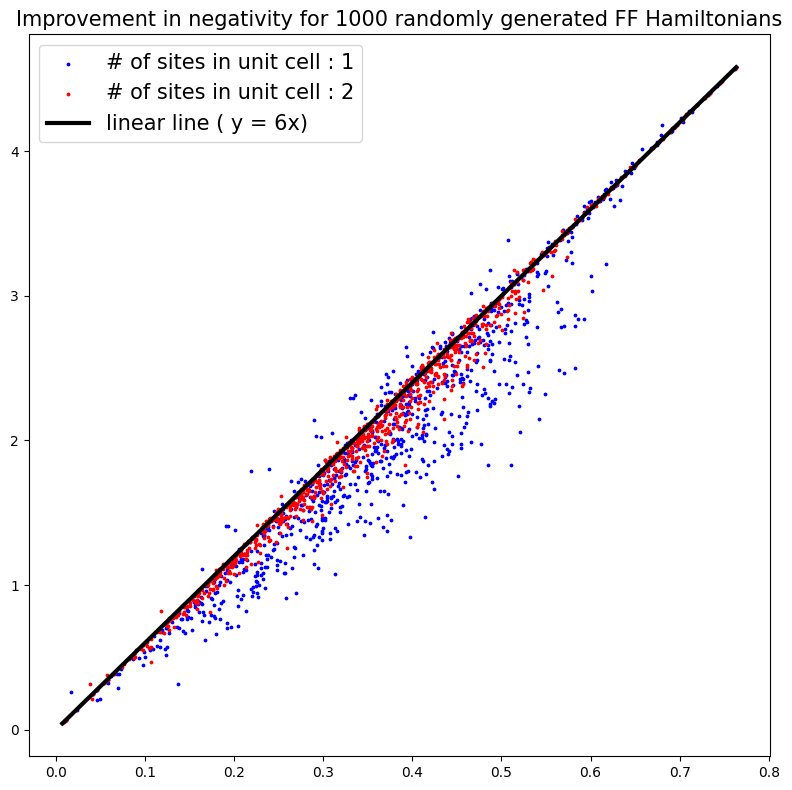

In [44]:
df = pd.DataFrame(res)
df2 = pd.DataFrame(res2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(- df['loss_u'] +  df["loss"], - df['neg_ori'] + df['neg_opt'], s = 3, c = "blue", label = "# of sites in unit cell : 1")
ax.scatter((- df2['loss_u'] + df2["loss"])/2, - df2['neg_ori'] + df2['neg_opt'], s = 3, c = "red", label = "# of sites in unit cell : 2")
min_ = (- df['loss_u'] +  df["loss"]).min()
max_ = (- df['loss_u'] +  df["loss"]).max()
x = np.linspace(min_, max_, 1000)
ax.plot(x, 6*x, label = "linear line ( y = 6x)", linewidth=3, c = "black")
ax.set_title("Improvement in negativity for 1000 randomly generated FF Hamiltonians", fontsize=15)
ax.legend(fontsize=15)
fig.tight_layout()
plot_filename = pythonPath / f'visualize/image/FF1D/scatter_neg_sps_{3}_bd_{bd}_lt_{1}.pdf'
fig.savefig(plot_filename, dpi=300, format = "pdf")


In [24]:
val = (df2['loss_u'] / df['loss_u'])
(val < 1).sum() / len(val)
loss_u2 = df2['loss_u'].values
loss_u = df['loss_u'].values
# loss_u2[val > 1] = loss_u[val > 1]

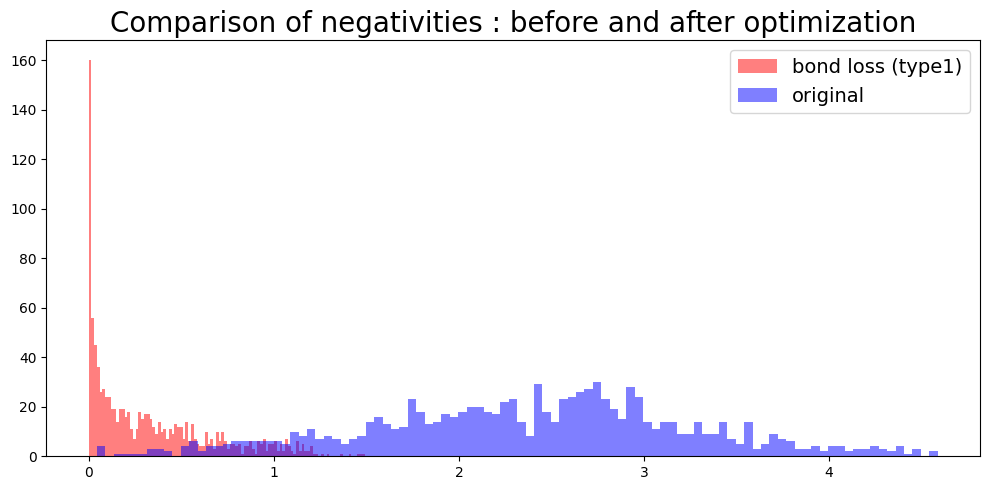

In [48]:
df = pd.DataFrame(res)
df2 = pd.DataFrame(res2)
# df.loss = df.loss / lt

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(-df['neg_opt'], label = "bond loss (type1)", bins = 100, alpha = 0.5, color = "r")
# ax.hist(-df4['neg_opt'], label = "non stoquastic (type1)", bins = 100, alpha = 0.5, color = "g")
ax.hist(-df['neg_ori'], label = "original", bins = 100, alpha = 0.5, color = "b")
# ax.hist(-df2['neg_opt'], label = "Optimized", bins = 100, alpha = 0.5, color = "b")
# 
# ax.hist(df2['neg_opt'], label = "# of sites in unit cell : 2", bins = 100)

ax.set_title("Comparison of negativities : before and after optimization", fontsize=20)
ax.legend(fontsize=14)
fig.tight_layout()
plot_filename = pythonPath / f'visualize/image/FF1D/hist_neg_sps_{3}_bd_{bd}_lt_{1}.pdf'
fig.savefig(plot_filename, dpi=300, format = "pdf")


In [56]:
df["neg_opt"].values / df4["neg_opt"].values

array([3.38892020e-01, 9.45977628e-01, 1.47129228e-01, 8.95004973e-01,
       6.20586126e-01, 7.14959558e-01, 1.14719282e-01, 4.34177100e-01,
       8.66563695e-03, 6.41967486e-01, 1.20012442e-02, 4.30879097e-01,
       8.18328633e-01, 1.66112045e-01, 9.66511546e-01, 1.14077744e+00,
       8.91008380e-01, 9.21090027e-01, 9.71223498e-01, 8.94523822e-01,
       5.15249382e-02, 8.30282412e-02, 5.38588493e-01, 5.46105286e-01,
       9.47435449e-01, 8.38301532e-01, 9.99970117e-01, 7.33334797e-02,
       1.01068732e+00, 3.29450788e-01, 9.13173828e-01, 9.90635709e-01,
       6.98385155e-01, 1.32526450e-02, 9.60600771e-01, 9.59541189e-01,
       8.98941833e-01, 1.07310099e+00, 5.17563487e-02, 1.92794084e-01,
       1.00036155e+00, 8.67034922e-01, 1.15166224e+00, 7.20616722e-01,
       2.44519459e-01, 7.39382228e-01, 1.05026768e+00, 1.01883703e+00,
       1.20653152e+00, 3.63215096e-03, 9.33284287e-01, 5.27992490e-01,
       1.23397894e+00, 3.69927200e-02, 1.07434402e+00, 3.68044131e-01,
      

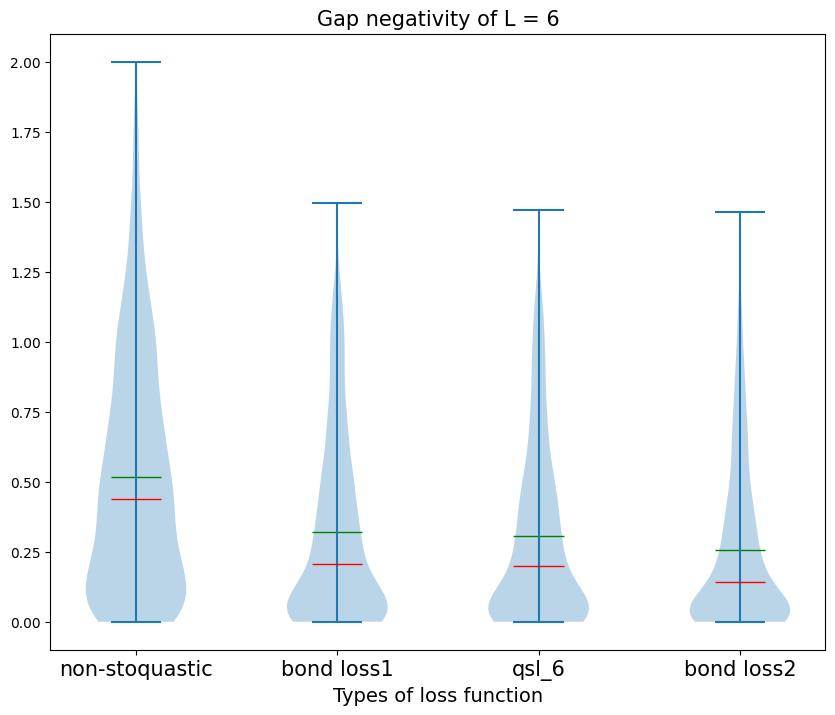

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 8))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
violin = ax.violinplot([-df4["neg_opt"], -df["neg_opt"], -df3["neg_opt"], -df2["neg_opt"]], showmeans=True, showmedians=True)
ax.set_title('Gap negativity of L = 6', fontsize=15)
labels = ["non-stoquastic",  "bond loss1", "qsl_6", "bond loss2"]
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, fontsize=15)
# ax.set_xlim(0.25, len(labels) + 0.75)
ax.set_xlabel('Types of loss function', fontsize=14)

# for partname in ('cmeans', 'cmedians'):
vp = violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)   
vp = violin["cmedians"]
vp.set_edgecolor("red")
vp.set_linewidth(1)   
# # plot box plot
# axs[1].boxplot(all_data)
# axs[1].set_title('Box plot')

# # adding horizontal grid lines
# for ax in axs:
#     ax.yaxis.grid(True)
#     ax.set_xticks([y + 1 for y in range(len(all_data))],
#                   labels=['x1', 'x2', 'x3', 'x4'])
#     ax.set_xlabel('Four separate samples')
#     ax.set_ylabel('Observed values')
plot_filename = pythonPath / f'visualize/image/FF1D/violinplot_gap_neg.pdf'
fig.savefig(plot_filename,format="pdf")
plt.show()

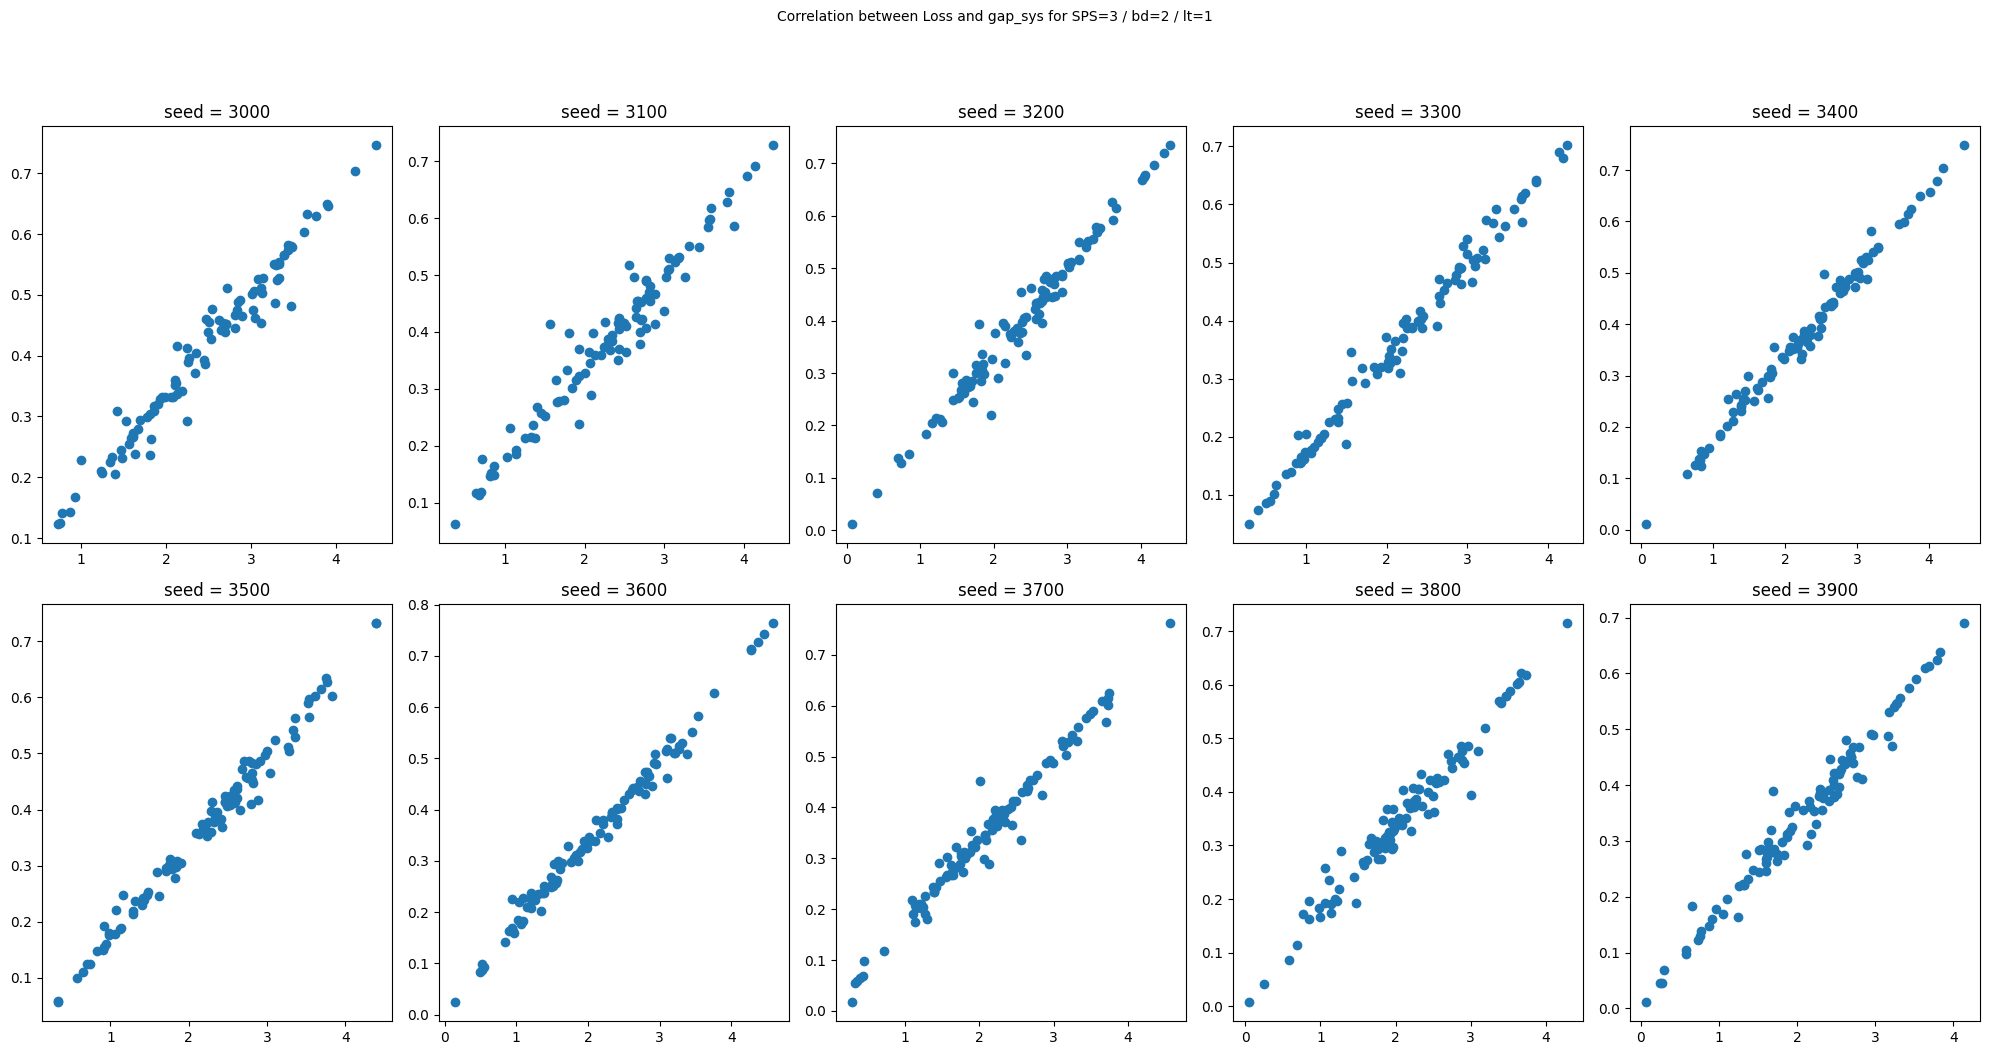

In [65]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))  # Corrected order here
for i in range(10):
    sample_df = df.iloc[i*100:(i+1)*100]
    ax[i//5, i % 5].scatter(-sample_df['neg_ori'] + sample_df['neg_opt'], sample_df['loss'] - sample_df["loss_u"])
    ax[i//5, i % 5].set_title(f"seed = {sample_df['seed'].iloc[0]}")
#     for j in range(len(sample_df)):  # Changed to 'j' to avoid conflict with outer loop
#         ax[i//5, i % 5].annotate(sample_df['seed'].iloc[j],  # Also changed to 'j' here
#                                  (sample_df['log_gap_sys'].iloc[j],
#                                   sample_df['loss'].iloc[j]),
#                                  textcoords="offset points", xytext=(0, 10), ha='center')

fig.suptitle(
    f'Correlation between Loss and gap_sys for SPS={sps} / bd={bd} / lt={lt}', size=10, y=1.05)
fig.tight_layout()
# plot_filename = f'visualize/image/FF1D/scatter_sps_{sps}_bd_{bd}_lt_{lt}.png'
# plt.savefig(plot_filename, dpi=300)


## Compare for different beta at L = 6

In [4]:
df.n_sites.unique()

array([ 29,  11,  73,  21,   8,   6, 100,  15,  54,  39,  42,  87,  69,
        51,  60,  33,  78, 105,  24,  96])

In [49]:
df_dict["mel"]

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
481,FF_1D,0.2,0.1000,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,475.306000,361.129000,-0.000166,0.000953,1.734140e+06,1.573670e+06,0.0,0.0,0.0,0.0,0,0.17387
492,FF_1D,0.2,0.2154,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.319463,0.020979,0.082990,0.001236,2.194420e-01,1.196280e-01,0.0,0.0,0.0,0.0,0,0.17387
485,FF_1D,0.2,0.4642,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.775455,0.002903,0.724603,0.001001,2.948140e-01,3.210640e-03,0.0,0.0,0.0,0.0,0,0.17387
488,FF_1D,0.2,1.0000,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,2.012790,0.003091,0.966527,0.000309,2.309860e-01,8.798630e-04,0.0,0.0,0.0,0.0,0,0.17387


In [45]:
data = np.concatenate([df_dict["mel"]['e'], df_dict["none"]['e']])
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q3, Q1)


2.013355 -0.7257452499999999


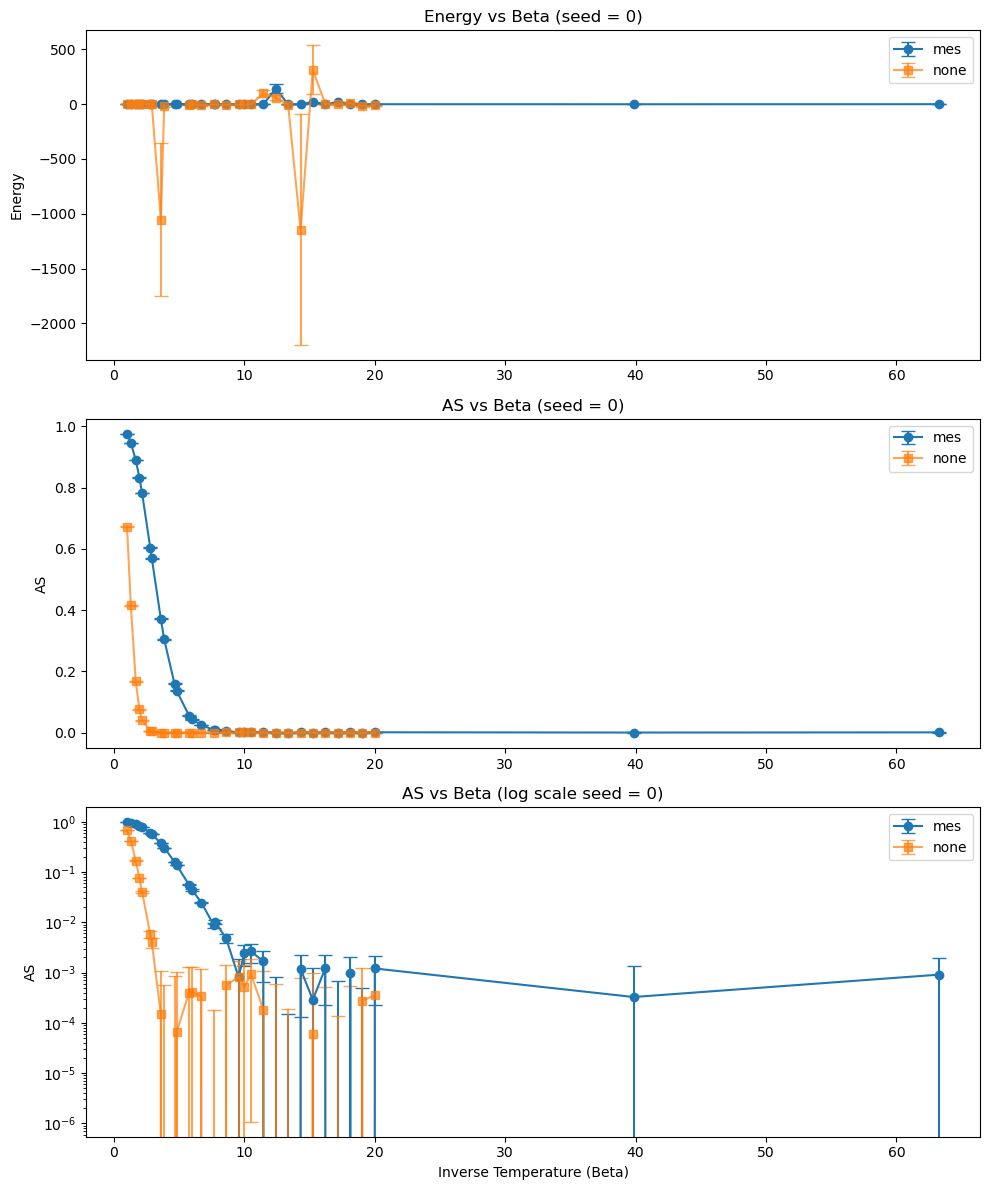

In [5]:
n = 6
df_n = df[df.n_sites == n]
seed_list = sorted(df_n.seed.unique())

for seed in [0]:
    dfs = df_n[df_n.seed == seed]
    df_dict = {}
    df_dict["mel"] = dfs[dfs.u_path.str.contains("mel")]
    df_dict["none"] = dfs[dfs.u_path == ""]

    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("temperature")["as"].idxmax()].sort_values(by="temperature")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    # gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.4)
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # Plotting Energy vs Inverse Temperature (Beta) in ax1
    ax1.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['e'], yerr=df_dict["mel"]['e_error'], fmt='o-', capsize=5, label='mes')
    ax1.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['e'], yerr=df_dict["none"]['e_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax1.set_title(f'Energy vs Beta (seed = {seed})')
    ax1.set_ylabel('Energy')
    ax1.legend()
#     ax1.set_ylim(-0.5, df_dict["mel"].e.iloc[-1]+0.1)

    # Plotting AS vs Inverse Temperature in ax2
    ax2.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax2.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax2.set_title(f'AS vs Beta (seed = {seed})')
    ax2.set_ylabel('AS')
    ax2.legend()

    # Plotting AS vs Inverse Temperature (Log Scale) in ax3
    ax3.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax3.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax3.set_title(f'AS vs Beta (log scale seed = {seed})')
    ax3.set_xlabel('Inverse Temperature (Beta)')
    ax3.set_ylabel('AS')
    ax3.set_yscale('log')
    ax3.legend()

    fig.tight_layout()
#     fig.show()
    fig.savefig(f"image/n_{n}_seed={seed}_mes_vs_none")
    



## Compare for different beta and different L

In [32]:
dft

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
245,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.802397,0.408123,0.000625,0.000957,163.592,121.109,0.0,0.0,0.0,0.0,0,0.17387
246,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.852408,0.292592,0.000910,0.001027,105.774,176.491,0.0,0.0,0.0,0.0,0,0.17387


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient
number of data is not sufficient


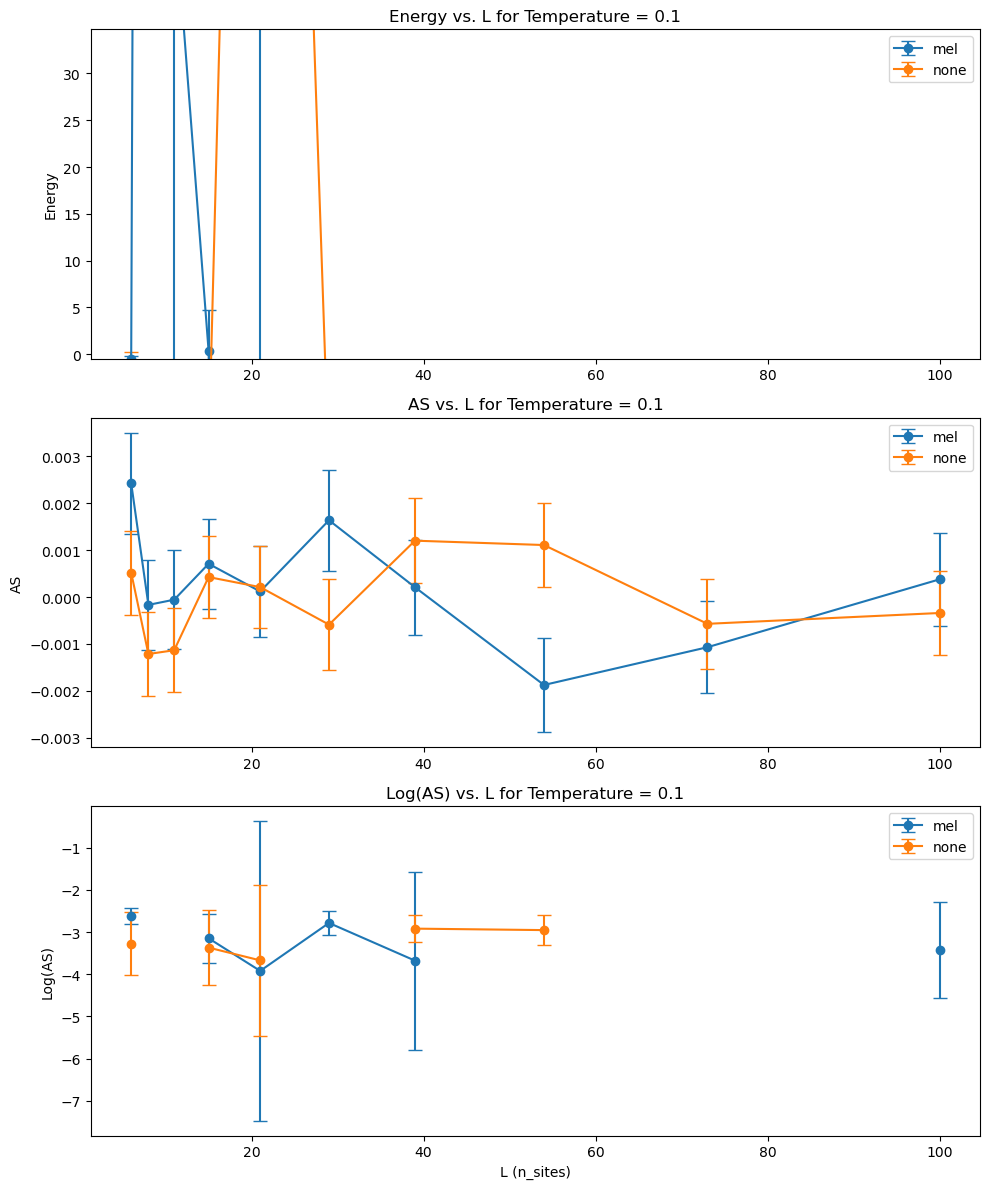

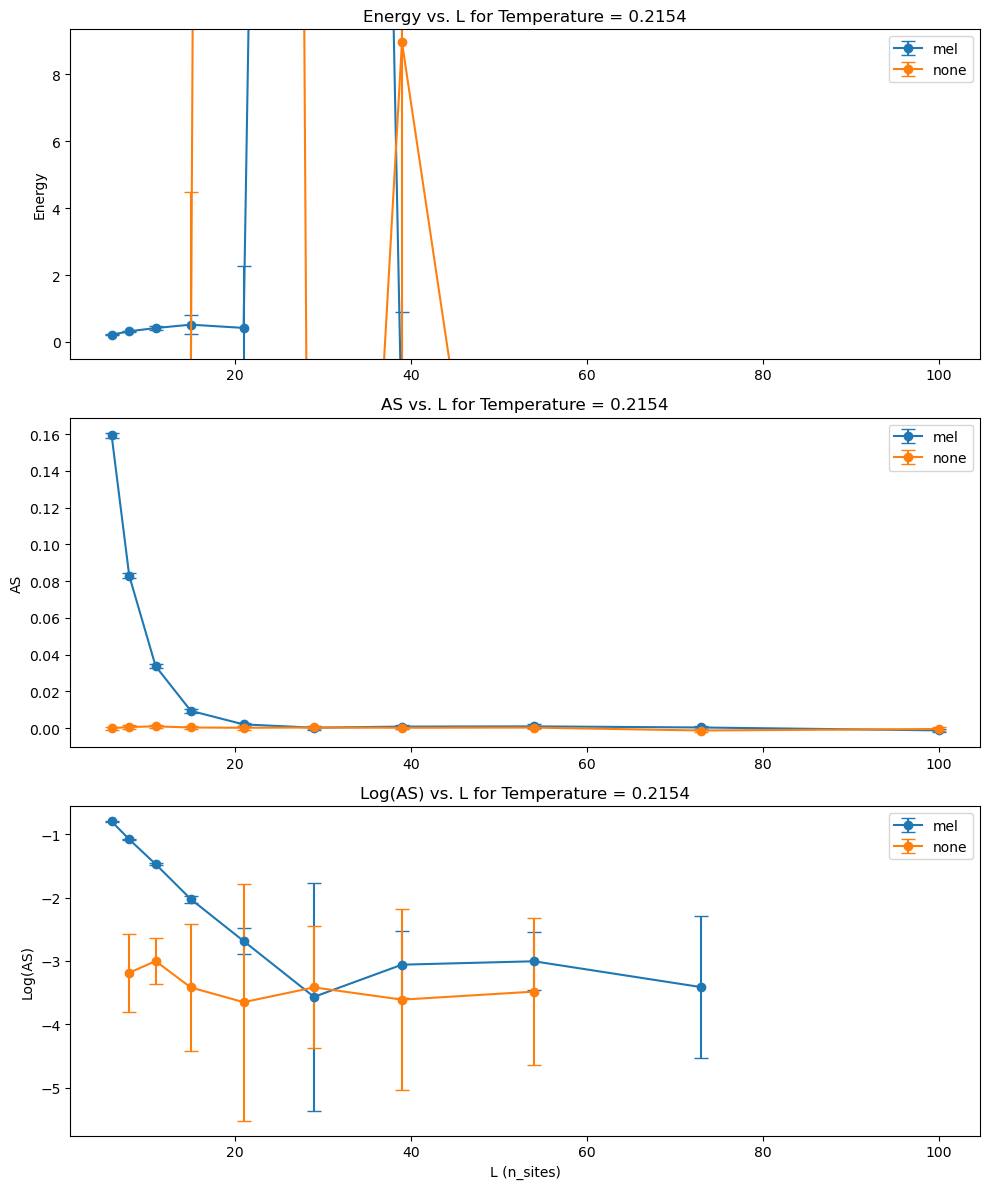

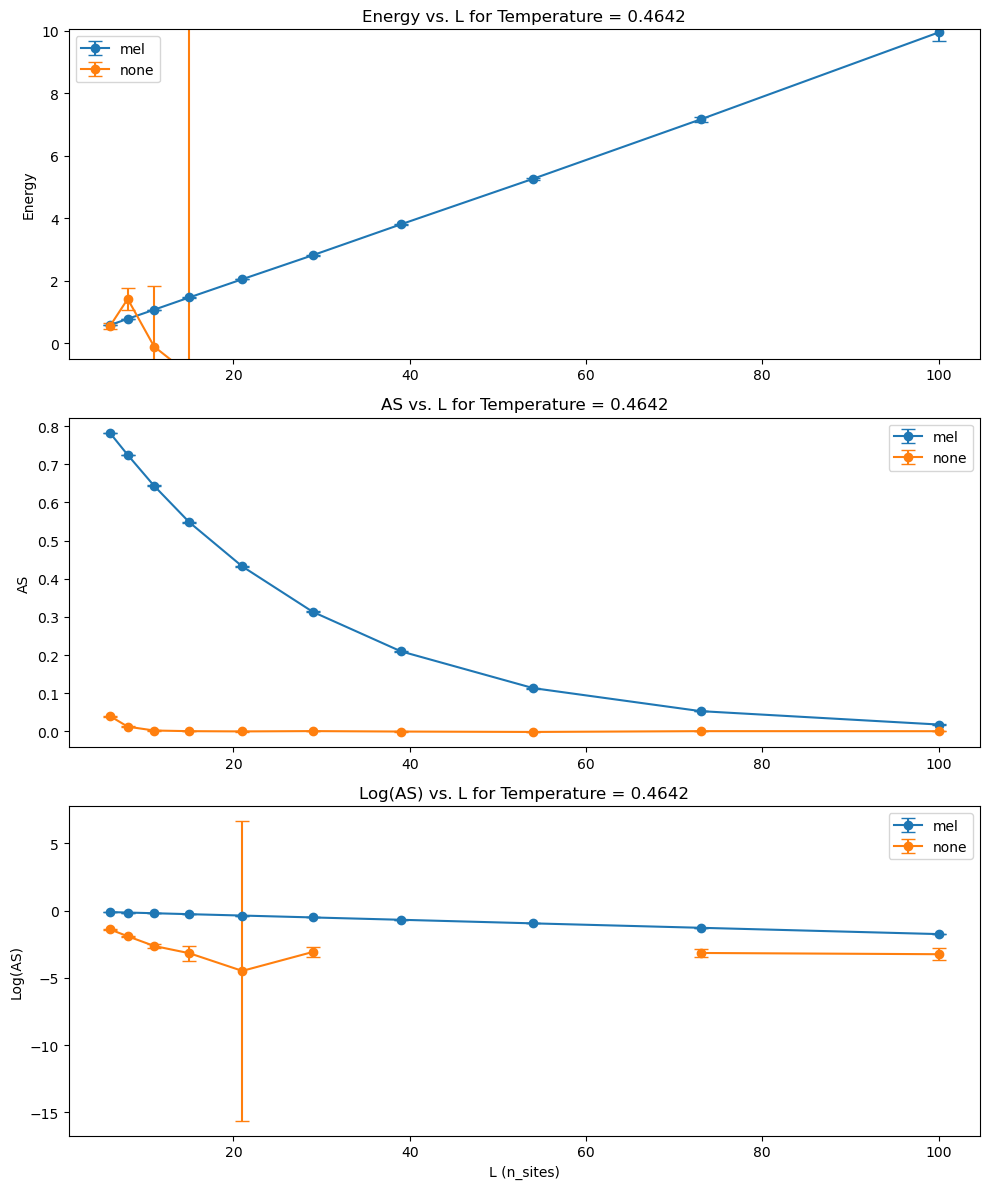

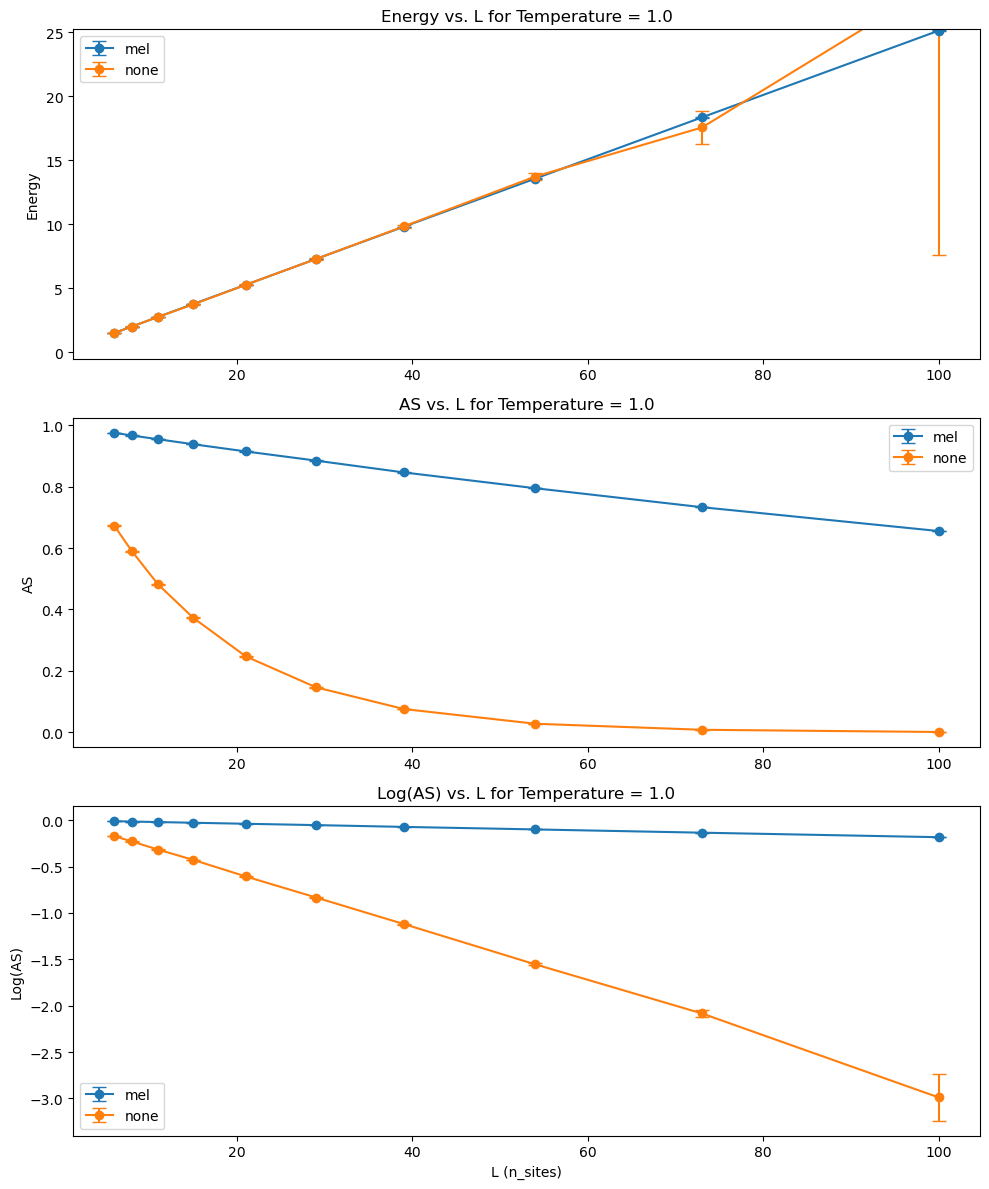

In [23]:
import matplotlib.pyplot as plt
import numpy as np

seed = 0
L_list = sorted(df.n_sites.unique())
dfs = df[df.seed == seed]
t_list = sorted(dfs.temperature.unique())

for t in t_list:
    dft = dfs[dfs.temperature == t]
    df_dict = {}
    df_dict["mel"] = dft[dft.u_path.str.contains("mel")]
    df_dict["none"] = dft[dft.u_path == ""]
    
    if (len(dft) / len(df_dict)) < 2:
        print("number of data is not sufficient")
        continue
    
    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("n_sites")["as"].idxmax()].sort_values(by="n_sites")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # 1. Plotting Energy vs L in ax1
    for key, _df in df_dict.items():
        ax1.errorbar(_df["n_sites"], _df["e"], yerr=_df["e_error"], label=key, marker='o', capsize=5)
    ax1.set_title(f'Energy vs. L for Temperature = {t}')
    ax1.set_ylabel('Energy')
#     ax1.set_ylim(-, 3)
    ax1.set_ylim(-0.5, np.abs(df_dict["mel"].e.iloc[-1]+0.1))
    ax1.legend()

    # 2. Plotting AS vs L in ax2
    for key, _df in df_dict.items():
        ax2.errorbar(_df["n_sites"], _df["as"], yerr=_df["as_error"], label=key, marker='o', capsize=5)
    ax2.set_title(f'AS vs. L for Temperature = {t}')
    ax2.set_ylabel('AS')
    ax2.legend()

    # 3. Plotting AS (log) vs L in ax3
    for key, _df in df_dict.items():
        as_log_error = np.abs(_df["as_error"] / (_df["as"] * np.log(10)))
        ax3.errorbar(_df["n_sites"], np.log10(_df["as"]), yerr=as_log_error, label=key, marker='o', capsize=5)
    ax3.set_title(f'Log(AS) vs. L for Temperature = {t}')
    ax3.set_xlabel('L (n_sites)')
    ax3.set_ylabel('Log(AS)')
    ax3.legend()

    fig.tight_layout()
    fig.savefig(f"image/seed={seed}_t={t}_mes_vs_none.png")
